# HackerEarth ML 1:  Predict the Road Sign

### Analysis

Download the dataset from the following link.

[Dataset Download](https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth/predict-the-road-sign/4b699168-4-here_dataset.zip)


Analyzing the data for understanding distribution of data and frequency of occurence of certain categorical variables.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Defining the paths to the train and test files

In [2]:
train_path = "./data/train.csv"
test_path = "./data/test.csv"

## Train dataset analysis

Analyzing the data in the training dataset.

In [3]:
df = pd.read_csv(train_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38485 entries, 0 to 38484
Data columns (total 7 columns):
Id                     38485 non-null object
DetectedCamera         38485 non-null object
AngleOfSign            38485 non-null int64
SignAspectRatio        38485 non-null float64
SignWidth              38485 non-null int64
SignHeight             38485 non-null int64
SignFacing (Target)    38485 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


Determining the distribution of null values in the dataframe, thus deciding the usability of features. (This will help us decide methods for dealing with null values and strategize on dropping columns)

In [60]:
print(df.isnull().sum())

Id                     0
DetectedCamera         0
AngleOfSign            0
SignAspectRatio        0
SignWidth              0
SignHeight             0
SignFacing (Target)    0
dtype: int64


### Field of vision and overlap


**Group the data based on detected camera, compute the maximum and minimum angles for each camera.**

In [5]:
camera_group = df.groupby(by="DetectedCamera")
for cam in camera_group.groups.keys():
    print("Camera direction: ", cam)
    print("Angles covered: ", sorted(camera_group.get_group(cam)['AngleOfSign'].unique()))

Camera direction:  Front
Angles covered:  [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 359, 360]
Camera direction:  Left
Angles covered:  [221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301


The field of vision for each individual camera is as follows:

| Camera Direction | Min Angle | Max Angle | Possible Range |
| :--------------: |:---------:| :--------:| :------------: |
| Front | $1^{\circ}, 311^{\circ}$ | $71^{\circ}, 360^{\circ}$ | $119^{\circ}$ |
| Right | $41^{\circ}$ | $161^{\circ}$ | $120^{\circ}$ |
| Rear | $131^{\circ}$ | $251^{\circ}$ | $120^{\circ}$ |
| Left | $221^{\circ}$ | $336^{\circ}$ | $115^{\circ}$ |

Based on the above table we get the following overlap data:

| \ | Front | Right | Rear | Left |
| :---: |:---:| :---:| :---: | :---: |
| Front | - | $30^{\circ}$ | - | $24^{\circ}$ |
| Right | $30^{\circ}$ | - | $30^{\circ}$ | - |
| Rear | - | $30^{\circ}$ | - | $30^{\circ}$ |
| Left | $24^{\circ}$ | - | $30^{\circ}$ | - |

Generalizing the cameras to have a range of about $120^{\circ}$

### Plotting field of vision and overlap

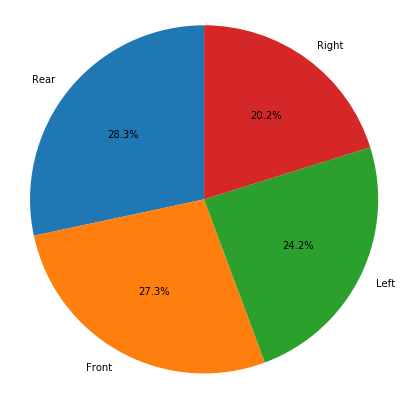

In [63]:
labels1 = df['DetectedCamera'].unique()
sizes1 = df['DetectedCamera'].value_counts()

pie1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

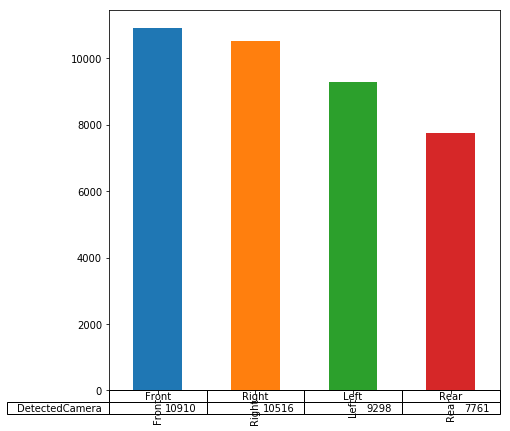

In [49]:
df['DetectedCamera'].value_counts().plot(kind='bar', table=True, figsize=(7, 7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112aff4a8>,
      dtype=object)

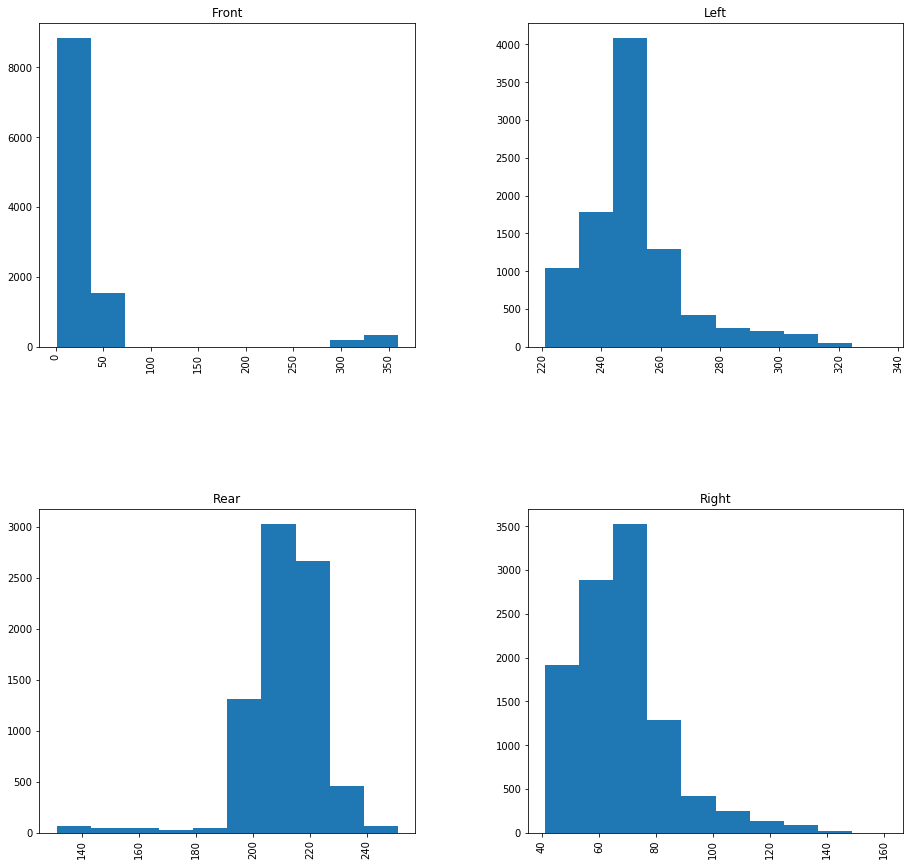

In [7]:
df.hist(column='AngleOfSign', by='DetectedCamera', figsize=(15, 15))

### Target and angle relation


**Angle relation with the detected direction**

In [64]:
sign_group = df.groupby(by=["SignFacing (Target)"])
#for cam in sign_group.groups.keys():
#    print("Camera direction: ", cam)
#    print("Angles covered: ", sorted(sign_group.get_group(cam)['AngleOfSign'].unique()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1149b7f28>,
      dtype=object)

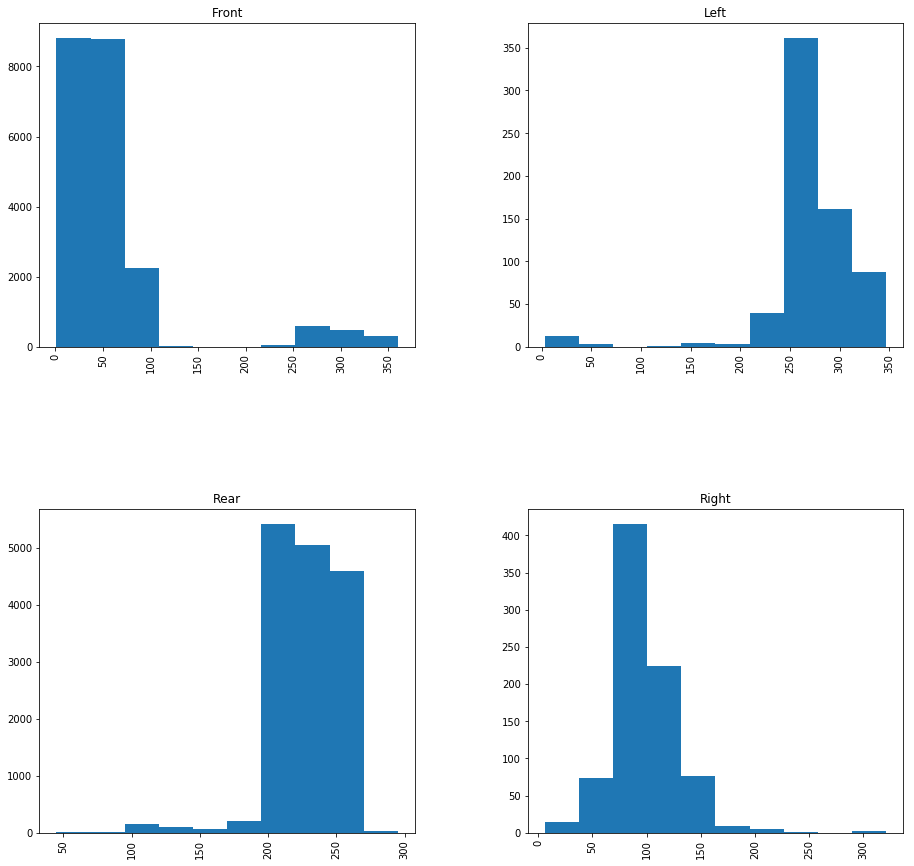

In [9]:
df.hist(column='AngleOfSign', by="SignFacing (Target)", figsize=(15, 15))


Based on the above visuals and computation we get the following relation data:

| Target Direction |       Angle range       |
|:----------------:|:-----------------------:|
|       Front      |      1-141  222-360     |
|       Right      | 6-208  220-228  320-321 |
|       Rear       |          45-295         |
|       Left       |  3-38  134-200  212-347 |

### Target to camera direction and angle relation


**Group data based on the detected camera and target, compute range of angles for which targets are achieved by camera.**

In [65]:
camera_sign_group = df.groupby(by=["DetectedCamera", "SignFacing (Target)"])
#for cam in camera_sign_group.groups.keys():
#    print("Camera direction: ", cam)
#    print("Angles covered: ", sorted(camera_sign_group.get_group(cam)['AngleOfSign'].unique()))


Based on the above computation, we get the following overlap data:

|  Camera \ Sign   |     Front     |     Right     |   Rear  |       Left       |
|:----------------:|:-------------:|:-------------:|:-------:|:----------------:|
|       Front      | 1-71, 311-360 | 6-67, 320-321 |    -    |   3-38, 311-347  |
|       Right      |     41-141    |     47-139    |  45-161 |         -        |
|       Rear       |       -       |    131-228    | 131-251 | 134-157, 195-229 |
|       Left       |    222-330    |       -       | 221-295 |      223-336     |

### Distribution of sign facing direction wrt detected camera

In [57]:
pie_table = pd.DataFrame(columns=['Camera+SignDirection', 'NumberOfEntries'])
for cam in camera_sign_group.groups.keys():
    pie_table = pie_table.append(pd.Series(['C '+cam[0]+' + S '+cam[1], camera_sign_group.get_group(cam).count()[0]], index=['Camera+SignDirection', 'NumberOfEntries']), ignore_index=True)

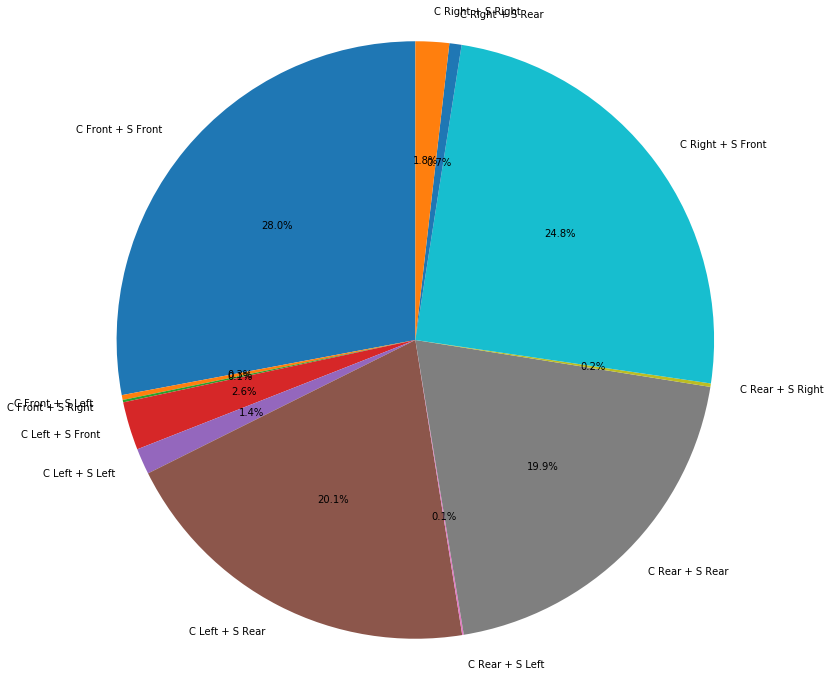

In [59]:
labels2 = pie_table['Camera+SignDirection']
sizes2 = pie_table['NumberOfEntries']



pie2, ax2 = plt.subplots(figsize=(12, 12))
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, )
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

From the above chart we see that:

  1. Majority of images captured are for signs in front of the car.
  2. Majority of images captured by Front and Right cameras are for signs in front of the car.
  3. Majority of images captured by the Rear and Left cameras are for signs behind the car.

## The Aspect ratio and image size(as captured, in pixels)

As per the problem description, we know that the sign height and width are the captured image size in pixels.

We can obtain the aspect ratio from the height and width using the formula:
$$ Aspect\;Ratio = \frac{Image\;Width}{Image\;Height}$$

**Thus, we can drop the aspect ratio column.**